In [1]:
from droplet_growth import register, mic, poisson, fit

from droplet_growth import multiwell as mw
from glob import glob
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np
from functools import partial, reduce
from operator import add
import pandas as pd
import re
from multiprocessing import Pool
import os
import seaborn as sns

from scipy import ndimage as ndi
%load_ext autoreload
%autoreload 2

In [2]:
!pwd

/home/aaristov/Documents/nd2shrink


In [3]:
paths_day1 = sorted(glob('/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/*ng-Composite.aligned.tif'))
paths_day1

['/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/00ng-Composite.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/04ng-Composite.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/08ng-Composite.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/16ng-Composite.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/256ng-Composite.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/32ng-Composite.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/64ng-Composite.aligned.tif']

In [4]:
paths_day2 = sorted(glob('/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/*ng*.aligned.tif'))
paths_day2

['/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/00ng-slide-5x-BF-TRITC..aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/04ng-BF-TRITC001.aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/08ng-BF-TRITC..aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/16ng-BF-TRITC..aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/256ng-BF-TRITC..aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/32ng-BF-TRITC..aligned.tif',
 '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/64ng-BF-TRITC..aligned.tif']

In [52]:
def get_concentration(path, regex='(\d+)ng.*.aligned.tif'):
    try:
        ng = re.compile(regex).findall(path)[0]
        print (int(ng))
        return int(ng)
    except IndexError:
        print('concentration not found')
        
def align_n_count_mic(path, regex='(\d+)ng.*.aligned.tif', n_max=10):
    # get concentration
    c = get_concentration(path, regex=regex)
    
    print(f'{path} {c} ng already aligned')
    _, fluo_aligned, mask_aligned = tf.imread(path)
    # count
    counts = mic.get_cell_numbers(
        fluo_aligned, 
        mask_aligned, 
        threshold_abs=2,
        plot=False,
        meta={'ng': c}
    )
    poisson.fit(counts.query(f'n_cells < {n_max}').n_cells, title=f'{c} ng')
    # return table
    counts.to_csv(ppp:=path.replace('.tif', '-counts.csv'))
    print(f'saving table {ppp}')
    return counts
    

256
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/256ng-BF-TRITC..aligned.tif 256 ng already aligned


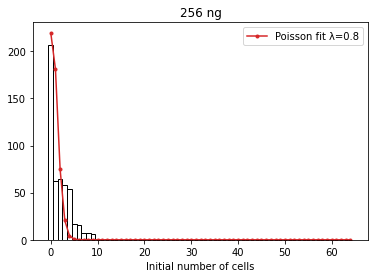

saving table /home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/256ng-BF-TRITC..aligned-counts.csv


label            x             y  n_cells   ng
0        1   663.248626    417.128241        0  256
1        2   664.647675    948.961450        2  256
2        3   665.043884   1475.729516        0  256
3        4   661.226322  16298.040220        4  256
4        5   660.757642  16826.050217        3  256
..     ...          ...           ...      ...  ...
496    497  5962.000000   4646.000000        4  256
497    498  5961.897296   5177.702880        1  256
498    499  5961.526499   5706.998255        0  256
499    500  5961.537016   6236.971642        6  256
500    501  5961.585169   6765.801022        0  256

[501 rows x 5 columns]

In [53]:
align_n_count_mic( '/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/256ng-BF-TRITC..aligned.tif', n_max=100)

In [28]:
list(map(get_concentration, paths_day1))

0
4
8
16
256
32
64


[0, 4, 8, 16, 256, 32, 64]

In [22]:
list(map(get_concentration, paths_day2))

0
4
8
16
256
32
64


[0, 4, 8, 16, 256, 32, 64]

In [32]:
p.close()

025632160648
4


/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/00ng-Composite.aligned.tif 0 ng already aligned
/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/32ng-Composite.aligned.tif 32 ng already aligned/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/16ng-Composite.aligned.tif 16 ng already aligned/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/00ng-slide-5x-BF-TRITC..aligned.tif 0 ng already aligned/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/256ng-Composite.aligned.tif 256 ng already aligned





/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/64ng-Composite.aligned.tif 64 ng already aligned
/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/08ng-Composite.aligned.tif 8 ng already aligned
/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1/04ng-Composite.aligned.tif 4 ng already aligned



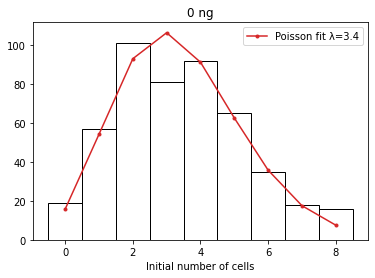

4
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/04ng-BF-TRITC001.aligned.tif 4 ng already aligned


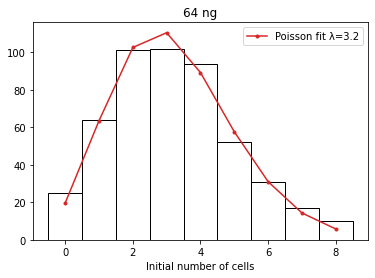

8
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/08ng-BF-TRITC..aligned.tif 8 ng already aligned


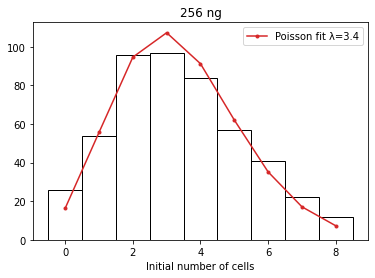

16
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/16ng-BF-TRITC..aligned.tif 16 ng already aligned


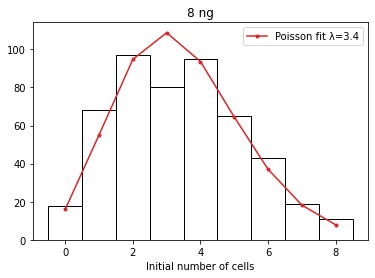

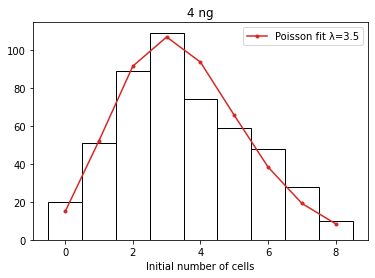

256
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/256ng-BF-TRITC..aligned.tif 256 ng already aligned
32
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/32ng-BF-TRITC..aligned.tif 32 ng already aligned


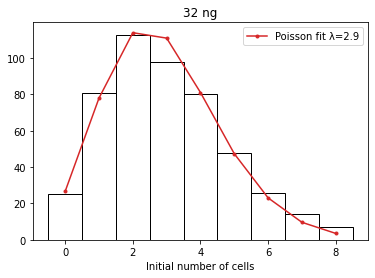

64
/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/64ng-BF-TRITC..aligned.tif 64 ng already aligned


/home/aaristov/miniconda3/envs/nd2/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


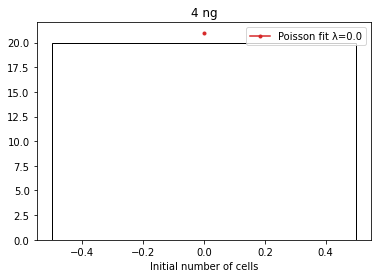

/home/aaristov/miniconda3/envs/nd2/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/aaristov/miniconda3/envs/nd2/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


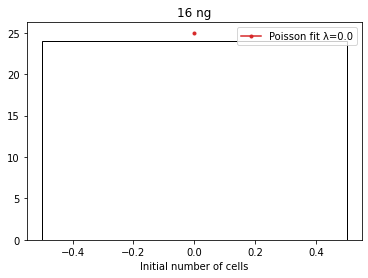

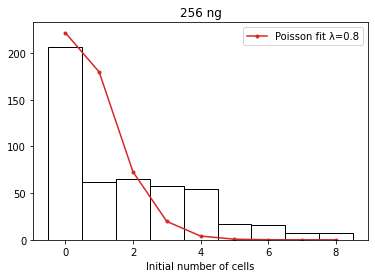

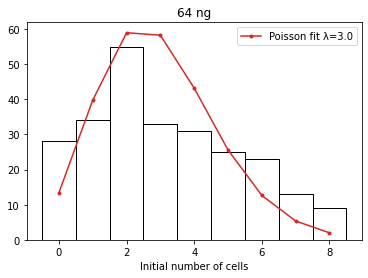

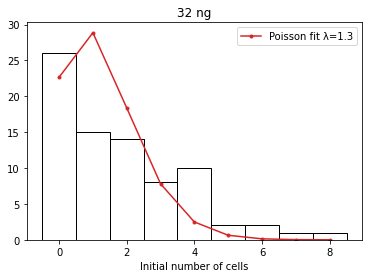

In [33]:
p = Pool(8)

In [34]:
counts = p.map(align_n_count_mic, paths_day1+paths_day2)

In [35]:
p.close()

In [61]:
counts_day1 = pd.concat([pd.read_csv(a, index_col=0) for a in glob('/home/aaristov/Anchor/Lena/Data/20211220-MIC/composites-day1//*ng*counts.csv')], ignore_index=True).sort_values(['ng','label']).reset_index()
counts_day2 = pd.concat([pd.read_csv(a, index_col=0) for a in glob('/home/aaristov/Anchor/Lena/Data/20211220-MIC/raw-24h/*ng*counts.csv')], ignore_index=True).sort_values(['ng','label']).reset_index()


In [62]:
counts_day2.reset_index()

level_0  index  label            x             y  n_cells   ng
0           0   2505      1   663.248626    417.128241       24    0
1           1   2506      2   664.647675    948.961450       56    0
2           2   2507      3   665.043884   1475.729516       75    0
3           3   2508      4   661.226322  16298.040220       82    0
4           4   2509      5   660.757642  16826.050217       94    0
...       ...    ...    ...          ...           ...      ...  ...
3502     3502   1999    497  5962.000000   4646.000000        4  256
3503     3503   2000    498  5961.897296   5177.702880        1  256
3504     3504   2001    499  5961.526499   5706.998255        0  256
3505     3505   2002    500  5961.537016   6236.971642        6  256
3506     3506   2003    501  5961.585169   6765.801022        0  256

[3507 rows x 7 columns]

In [59]:
counts_day1

label            x             y  n_cells   ng
2004      1   663.248626    417.128241        1    0
2005      2   664.647675    948.961450        5    0
2006      3   665.043884   1475.729516        5    0
2007      4   661.226322  16298.040220        2    0
2008      5   660.757642  16826.050217        1    0
...     ...          ...           ...      ...  ...
997     497  5962.000000   4646.000000        4  256
998     498  5961.897296   5177.702880        2  256
999     499  5961.526499   5706.998255        4  256
1000    500  5961.537016   6236.971642       10  256
1001    501  5961.585169   6765.801022        4  256

[3507 rows x 5 columns]

In [63]:
np.testing.assert_array_equal(counts_day1[['ng','label']], counts_day2[['ng','label']],)

In [64]:
table = counts_day1.copy()
table.loc[:,'n24'] = counts_day2.n_cells
table

index  label            x             y  n_cells   ng  n24
0      2004      1   663.248626    417.128241        1    0   24
1      2005      2   664.647675    948.961450        5    0   56
2      2006      3   665.043884   1475.729516        5    0   75
3      2007      4   661.226322  16298.040220        2    0   82
4      2008      5   660.757642  16826.050217        1    0   94
...     ...    ...          ...           ...      ...  ...  ...
3502    997    497  5962.000000   4646.000000        4  256    4
3503    998    498  5961.897296   5177.702880        2  256    1
3504    999    499  5961.526499   5706.998255        4  256    0
3505   1000    500  5961.537016   6236.971642       10  256    6
3506   1001    501  5961.585169   6765.801022        4  256    0

[3507 rows x 7 columns]

In [65]:
table.query('ng==256')

index  label            x             y  n_cells   ng  n24
3006    501      1   663.248626    417.128241        2  256    0
3007    502      2   664.647675    948.961450        2  256    2
3008    503      3   665.043884   1475.729516        2  256    0
3009    504      4   661.226322  16298.040220        5  256    4
3010    505      5   660.757642  16826.050217        5  256    3
...     ...    ...          ...           ...      ...  ...  ...
3502    997    497  5962.000000   4646.000000        4  256    4
3503    998    498  5961.897296   5177.702880        2  256    1
3504    999    499  5961.526499   5706.998255        4  256    0
3505   1000    500  5961.537016   6236.971642       10  256    6
3506   1001    501  5961.585169   6765.801022        4  256    0

[501 rows x 7 columns]

In [66]:
table.loc[:, 'final_state'] = table.n24 > 10

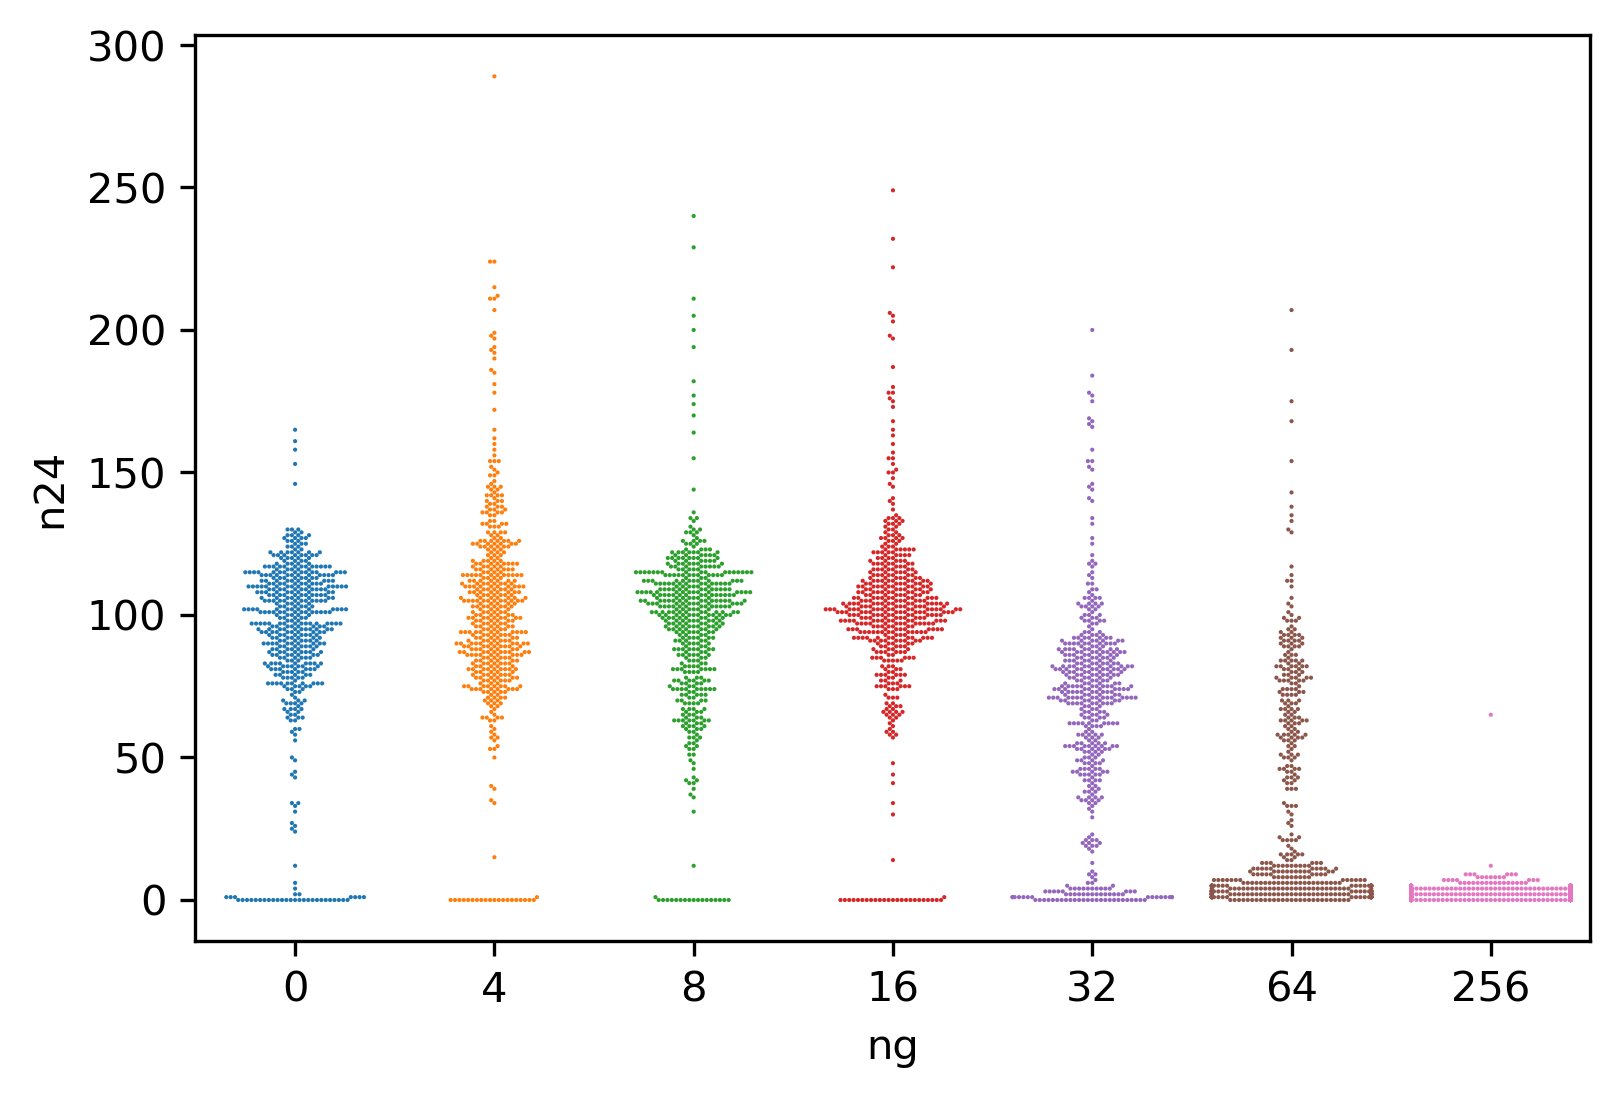

In [67]:
fig, ax = plt.subplots(dpi=300)
sns.swarmplot(ax=ax, data=table, x='ng', y='n24', size=1)

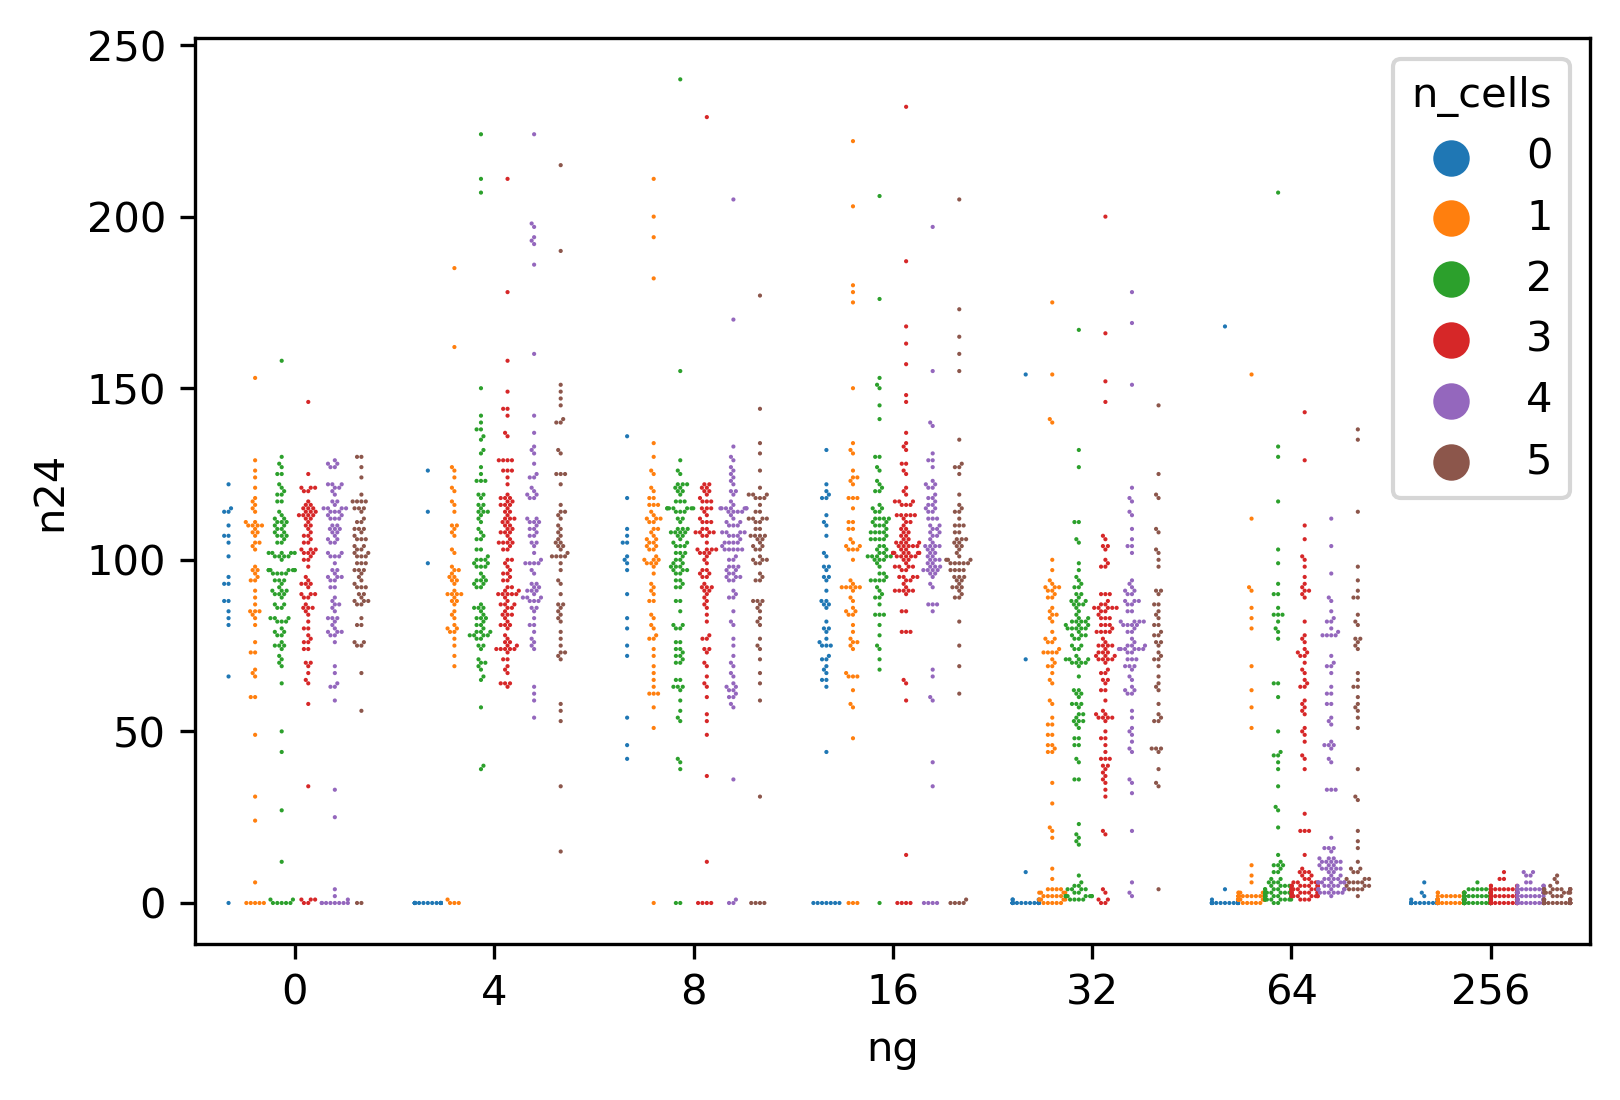

In [68]:
fig, ax = plt.subplots(dpi=300)
sns.swarmplot(ax=ax, data=table.query('n_cells < 6'), x='ng', y='n24', hue='n_cells', dodge=True, size=1)

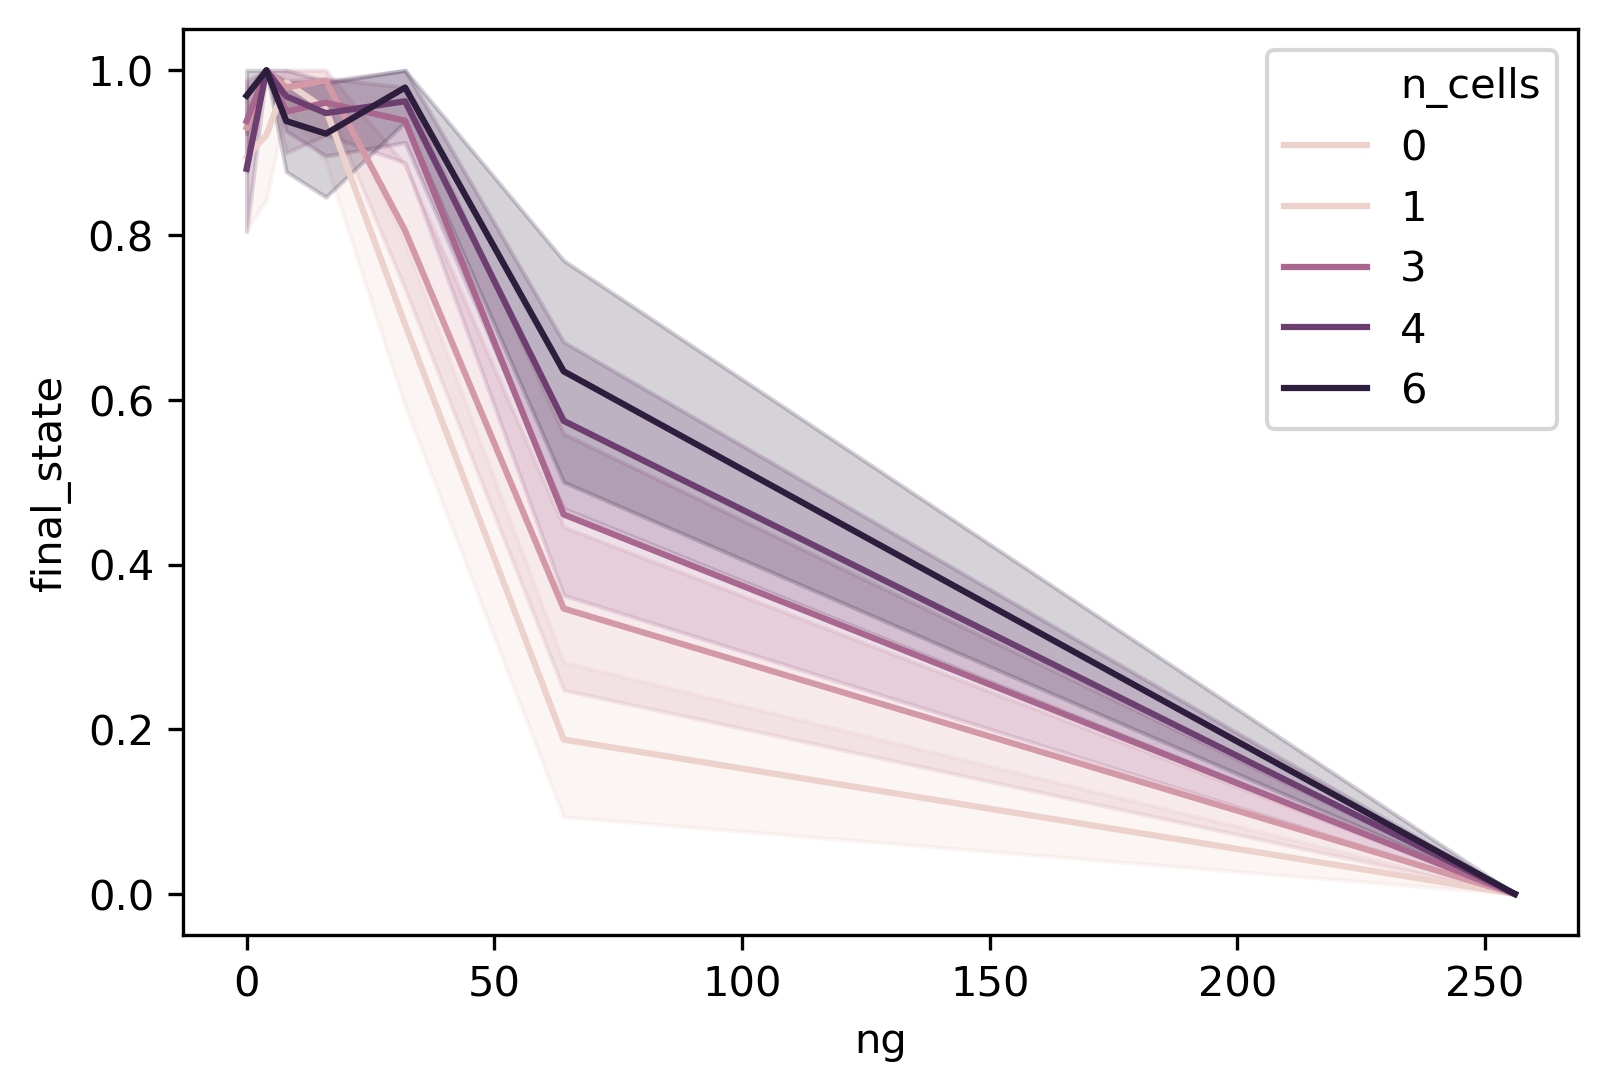

In [75]:
fig, ax = plt.subplots(dpi=300)
sns.lineplot(ax=ax, data=table.query('0 < n_cells < 6'), x='ng', y='final_state', hue='n_cells')

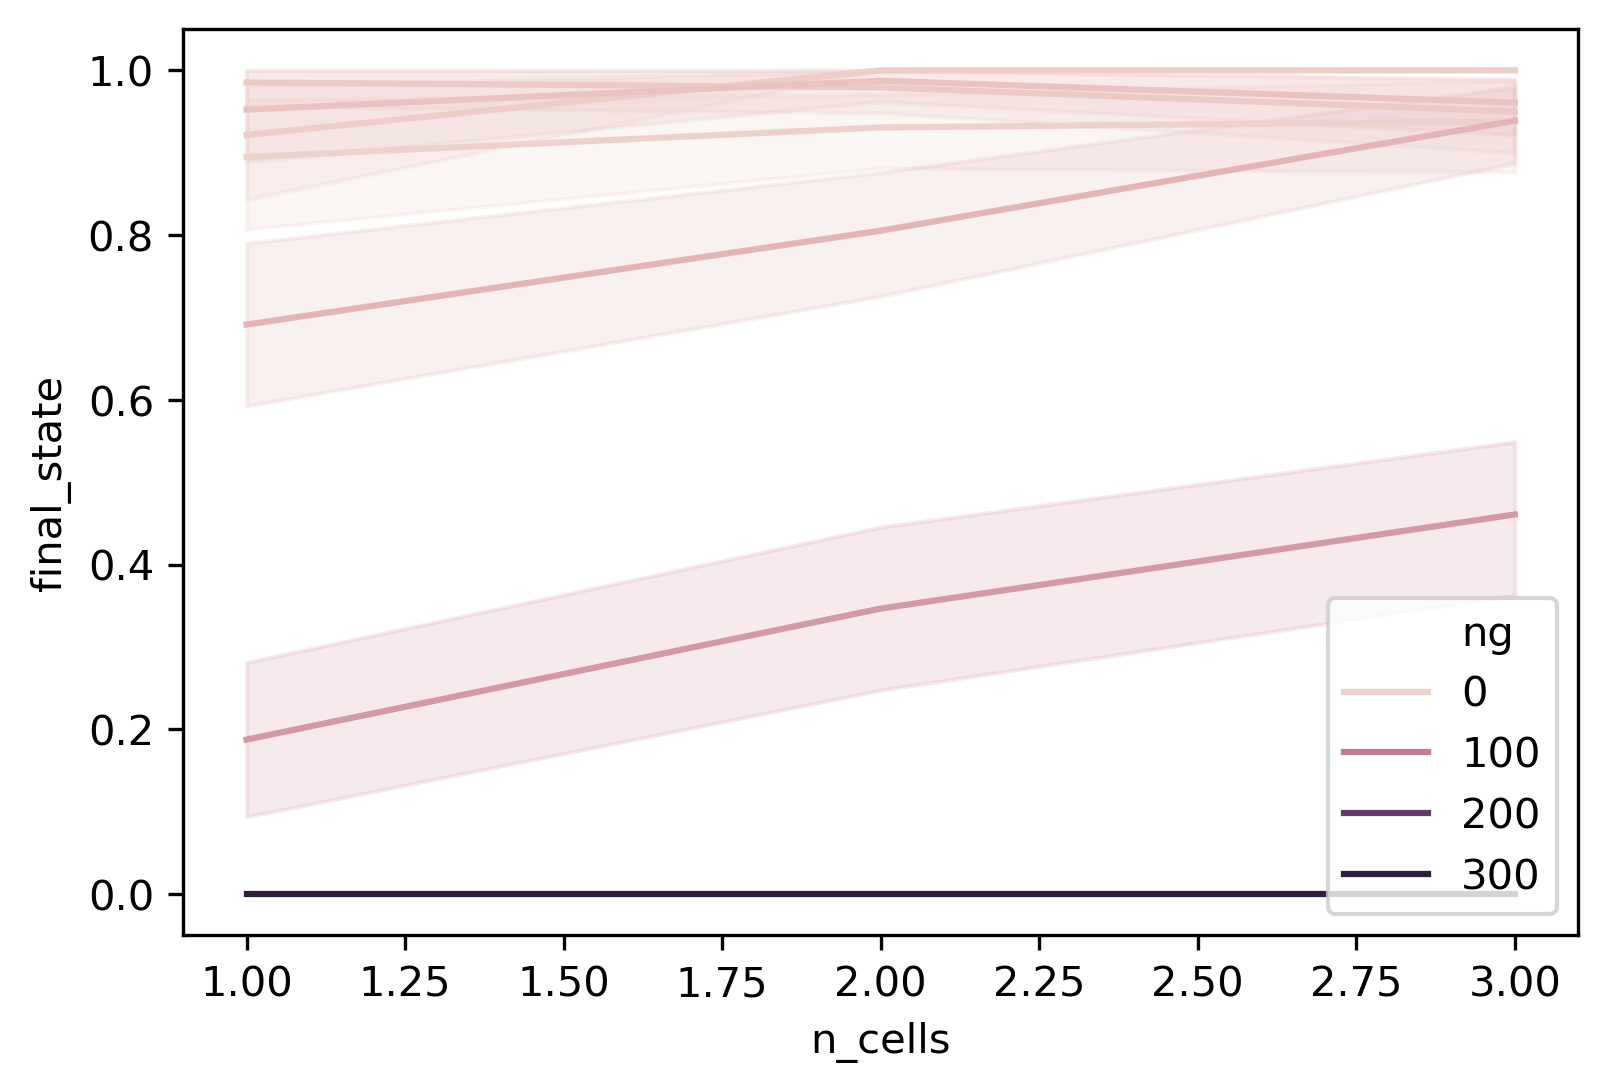

In [70]:
fig, ax = plt.subplots(dpi=300)
sns.lineplot(ax=ax, data=table.query('0 < n_cells < 4'), x='n_cells', y='final_state', hue='ng')

/home/aaristov/miniconda3/envs/nd2/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


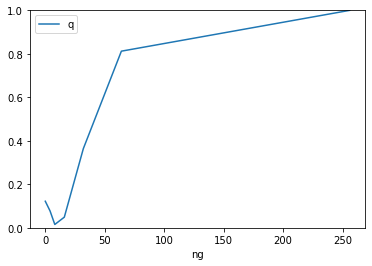

ng  prob_survive         q                precision           MSE
0    0  8.778683e-01  0.122132    [0.07200626939253155]  4.403895e-03
1    4  9.225078e-01  0.077492  [0.0030115249241871073]  7.432083e-06
2    8  9.846318e-01  0.015368     [0.0438533225231097]  1.539945e-03
3   16  9.510692e-01  0.048931    [0.05038137330035266]  2.050177e-03
4   32  6.358702e-01  0.364130   [0.033340139925130075]  1.541582e-03
5   64  1.876595e-01  0.812341  [0.0020551390173563977]  5.709401e-05
6  256  2.181057e-12  1.000000                    [inf]  5.232596e-23

In [74]:
mic.fit.single_prob(mic.get_stats(table, ))